# Lab 2: Plot Combinations of Raster Bands & Calculate and classify Normalized Difference Results with EarthPy

Original tutorial content ([1](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_calculate_classify_ndvi.html), [2](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_rgb.html)) was created by the EarthPy team. This lab expands/combines a bit of their work and includes some additional readings.

## Relevant course objectives
* Comprehend theory and the application of geospatial technologies. 
* Develop technical literacy through hands-on training in geospatial technologies and their application.
* Examine a spatial question and analyze geospatial data using GIS tools and technologies.
* Perform analyses using remote sensing and image analysis techniques.
* Assess both the value and limitations of remotely sensed data for a variety of applications.
* Develop and apply oral and written communication skills.


## Lesson goals
* Calculate and classify a spectral index derived from satellite imagery data ([NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index), [Landsat 8](https://en.wikipedia.org/wiki/Landsat_8))
* Use programming to automate an applied remote sensing task ([EarthPy](https://earthpy.readthedocs.io/en/latest/index.html))

## Before you get started
Read about this lab's data source and spectral index formula
### Data source
> Landsat 8 (formerly the Landsat Data Continuity Mission, or LDCM) was launched on an Atlas-V rocket from Vandenberg Air Force Base, California on February 11, 2013. The satellite carries the Operational Land Imager (OLI) and the Thermal Infrared Sensor (TIRS) instruments. 
> 
> The OLI measures in the visible, near infrared, and shortwave infrared portions (VNIR, NIR, and SWIR) of the spectrum. The TIRS measures land surface temperature in two thermal bands with a new technology that applies quantum physics to detect heat. Landsat 8 images have 15-meter panchromatic and 30-meter multi-spectral spatial resolutions along a 185 km (115 mi) swath.
> 
> [-USGS Docs](https://www.usgs.gov/landsat-missions/landsat-8)

Sensor bands of interest
* Band 2: Blue
  * $0.450-0.51μm$ wavelengths
  * 30m x 30m pixel size
* Band 3: Green
  * $0.53-0.59μm$ wavelengths
  * 30m x 30m pixel size
* Band 4: Red
  * $0.64-0.67μm$ wavelengths
  * 30m x 30m pixel size
* Band 5: Near-Infrared (NIR)
  * $0.85-0.88μm$ wavelengths
  * 30m x 30m pixel size

### Index formula
$NDVI = \frac{NIR - R}{NIR + R}$

* For Landsat 8-9, this translates to $\frac{Band 5 – Band 4}{Band 5 + Band 4}$



## Part 1

In [1]:
# Install EarthPy
# https://pip.pypa.io/en/stable/
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 20.1 MB/s eta 0:00:00


In [2]:
# Import the needed packages, I've linked the docs in case you'd like to read more
import os #https://docs.python.org/3/library/os.html
from glob import glob #https://docs.python.org/3/library/glob.html
import numpy as np #https://numpy.org/
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot
from matplotlib.colors import ListedColormap #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
import earthpy as et #https://earthpy.readthedocs.io/en/latest/api/earthpy-data.html
import earthpy.spatial as es #https://earthpy.readthedocs.io/en/latest/api/earthpy.spatial.html
import earthpy.plot as ep #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html

In [3]:
# List the available data sets
et.data

Available Datasets: ['california-rim-fire', 'co-flood-extras', 'cold-springs-fire', 'cold-springs-landsat-scenes', 'cold-springs-modis-h4', 'colorado-flood', 'cs-test-landsat', 'cs-test-naip', 'naip-fire-crop', 'ndvi-automation', 'spatial-vector-lidar', 'twitter-flood', 'vignette-elevation', 'vignette-landsat']

In [4]:
# Get Landasat data
# https://earthpy.readthedocs.io/en/latest/api/earthpy.io.html#earthpy.io.Data.get_data
data = et.data.get_data("vignette-landsat") 

Extracted output to /root/earth-analytics/data/vignette-landsat/.


In [5]:
# List out contents of downloaded Landsat data directory
# https://man7.org/linux/man-pages/man1/ls.1.html
!ls /root/earth-analytics/data/vignette-landsat/

LC08_L1TP_034032_20160621_20170221_01_T1_ANG.txt
LC08_L1TP_034032_20160621_20170221_01_T1_MTL.txt
LC08_L1TP_034032_20160621_20170221_01_T1_pixel_qa_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_radsat_qa_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_aerosol_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7_crop.tif
vector_layers


In [6]:
# Set your home working directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics")) #https://docs.python.org/3/library/os.html#os.chdir

# Stack the Landsat 8 bands
# This creates a numpy array with each entry representing a file path that corresponds to a single band of the Landsat 8 data
landsat_path = glob("data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif")

# Sort the array
landsat_path.sort() #https://numpy.org/doc/stable/reference/generated/numpy.sort.html

# Convert the array of raster file paths into a stacked numpy array, set no data value to -9999
arr_st, meta = es.stack(landsat_path, nodata=-9999) #https://earthpy.readthedocs.io/en/latest/api/earthpy.spatial.html#earthpy.spatial.stack

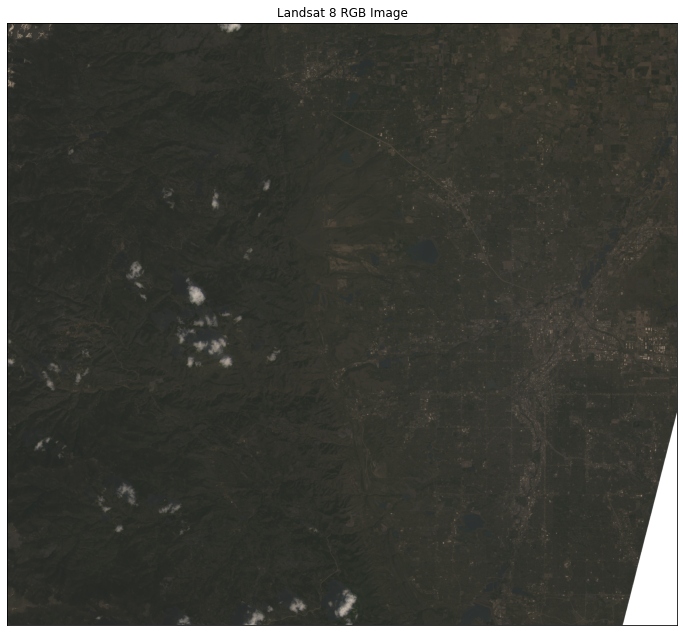

In [7]:
# Plot RBG image
fig, ax = plt.subplots(figsize=(12, 12)) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
ep.plot_rgb(arr_st, rgb=(3, 2, 1), ax=ax, title="Landsat 8 RGB Image") #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_rgb
plt.show() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

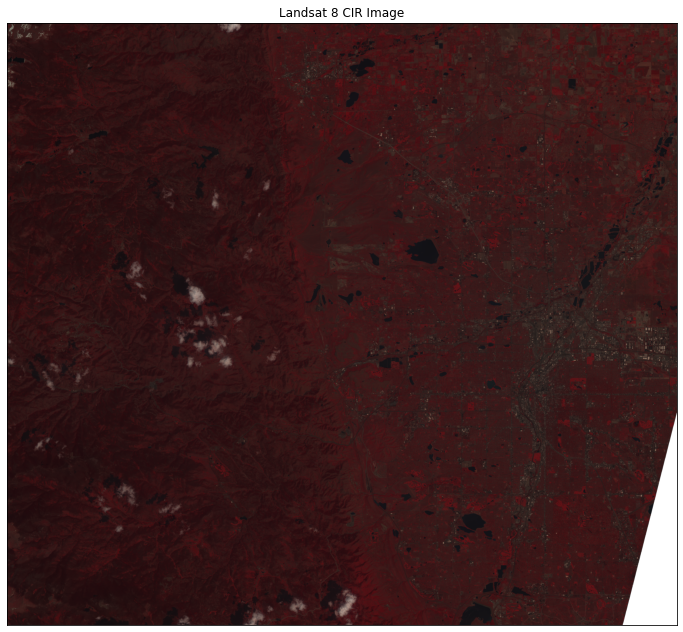

In [8]:
# Plot color infrared (CIR) image
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12)) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot NIR, red, and green bands, respectively, with stretch
ep.plot_rgb(
    arr_st,
    rgb=(4, 3, 2),
    ax=ax,
    title="Landsat 8 CIR Image",
    ) #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_rgb

plt.show() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

In [9]:
# Calculate NDVI
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
ndvi = es.normalized_diff(arr_st[4], arr_st[3]) #https://earthpy.readthedocs.io/en/latest/api/earthpy.spatial.html#earthpy.spatial.normalized_diff

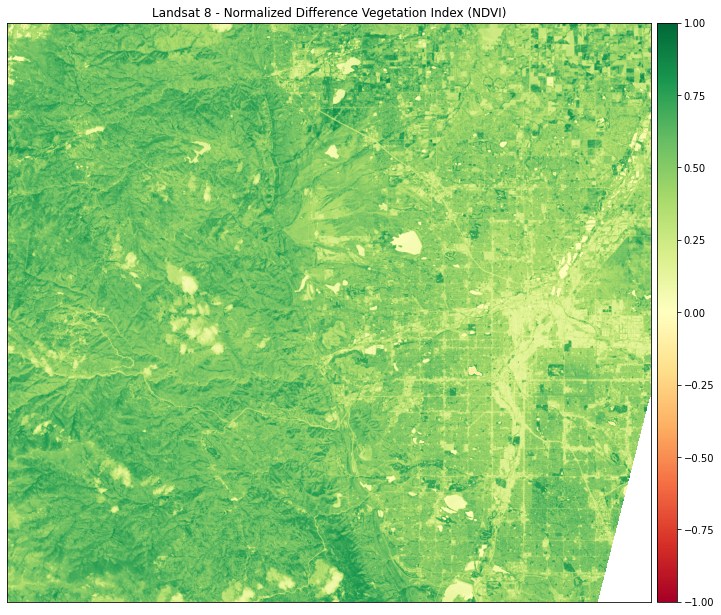

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [10]:
# Plot NDVI

title = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=title, vmin=-1, vmax=1) #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_bands



In [11]:
# Create NDVI classes
# Values under 0 will be classified together as no vegetation. 
# Additional classes will be created for bare area and low, moderate, and high vegetation areas.
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins) #https://numpy.org/doc/stable/reference/generated/numpy.digitize.html

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
    ) #https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_where.html

np.unique(ndvi_landsat_class) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html

masked_array(data=[1, 2, 3, 4, 5, --],
             mask=[False, False, False, False, False,  True],
       fill_value=999999)

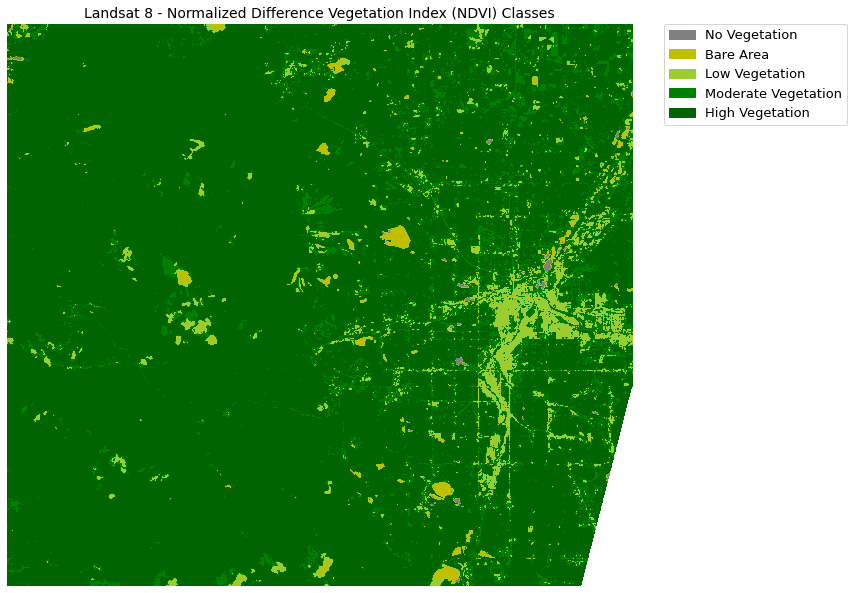

In [12]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors) #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html
classes = classes.tolist() #https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html

# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names) #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.draw_legend

ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
    ) #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

ax.set_axis_off() #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_axis_off.html

# Auto adjust subplot to fit figure size
plt.tight_layout() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

Let's refactor our code a bit then make it possible to run all the steps with a function command called `run_everything`

In [13]:
class NDVI:
  def __init__(self, data_dir, file_name_glob, no_data_value):
    self.data_dir = data_dir
    self.file_name_glob = file_name_glob
    self.no_data_value = no_data_value
    
    os.chdir(os.path.join(et.io.HOME, data_dir))
  
  def calculate(self, red_band_number, nir_band_number):
    data_path = glob(
    self.file_name_glob
    )
    data_path.sort()
    self.arr_st, self.meta = es.stack(landsat_path, nodata=-9999)
    self.ndvi = es.normalized_diff(self.arr_st[nir_band_number], self.arr_st[red_band_number])
  
  def plot_ndvi(self, layer, titles, cmap):
    ep.plot_bands(layer, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)
  
  def classify(self, class_bins):
    # Create classes and apply to NDVI results
    self.ndvi_class = np.digitize(self.ndvi, class_bins)
    # Apply the nodata mask to the newly classified NDVI data
    self.ndvi_class = np.ma.masked_where(
        np.ma.getmask(self.ndvi), self.ndvi_class
    )
    self.classes = np.unique(self.ndvi_class)
    self.classes = self.classes.tolist()
    self.classes = self.classes[0:5]

  def plot_classes(self, class_names, cmap_colors, title):
    cmap = ListedColormap(cmap_colors)
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(self.ndvi_class, cmap=cmap)
    ep.draw_legend(im_ax=im, classes=self.classes, titles=class_names)
    ax.set_title(title, fontsize=14)
    ax.set_axis_off()
    plt.tight_layout()


def run_everything(
    data_dir,
    file_name_glob,
    no_data_value,
    red_band_number,
    nir_band_number,
    ndvi_plot_title,
    ndvi_plot_cmap,
    ndvi_class_bins,
    ndvi_class_names,
    ndvi_class_colors,
    ndvi_class_title,
    your_csulb_email
    ):
  
  index = NDVI(
    data_dir=data_dir, 
    file_name_glob=file_name_glob,
    no_data_value=no_data_value
    )

  index.calculate(
      red_band_number=red_band_number, 
      nir_band_number=nir_band_number
      )
  
  index.plot_ndvi(
    layer=index.ndvi, 
    titles=[ndvi_plot_title + " " + your_csulb_email],
    cmap=ndvi_plot_cmap
    )
  
  index.classify(
    class_bins=ndvi_class_bins
    )
  
  index.plot_classes(
    class_names=ndvi_class_names,
    cmap_colors=ndvi_class_colors,
    title=ndvi_class_title + " " + your_csulb_email
)
  


Please update the code cell below.
* Update `your_csulb_email` value to your actual CSULB email address

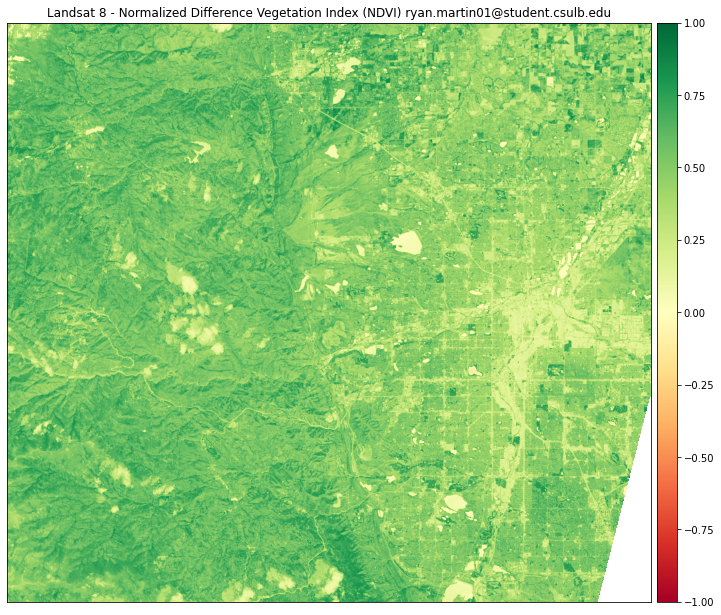

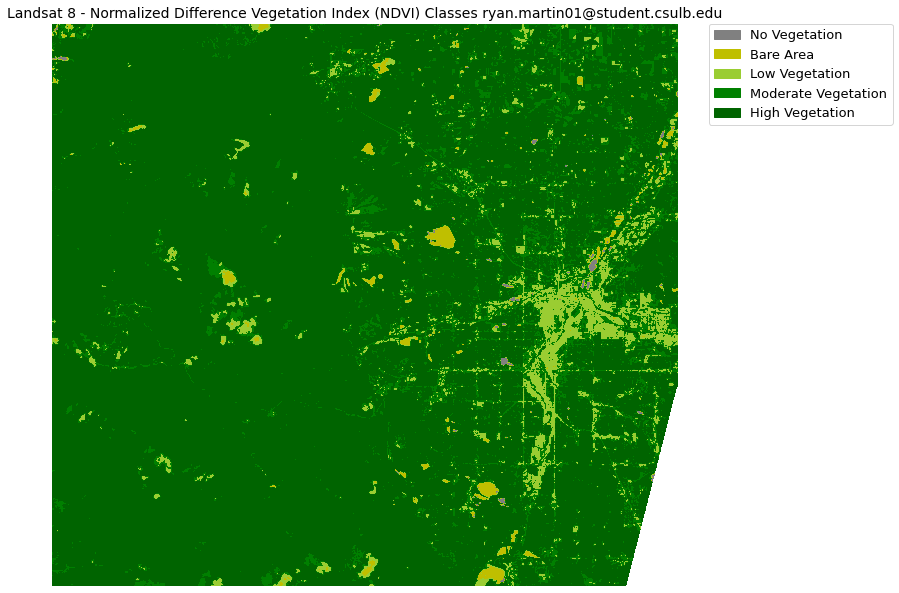

In [14]:
run_everything(
    data_dir="earth-analytics",
    file_name_glob="data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif",
    no_data_value=-9999,
    red_band_number=3,
    nir_band_number=4,
    ndvi_plot_title="Landsat 8 - Normalized Difference Vegetation Index (NDVI)",
    ndvi_plot_cmap="RdYlGn",
    ndvi_class_bins=[-np.inf, 0, 0.1, 0.25, 0.4, np.inf],
    ndvi_class_names=["No Vegetation", "Bare Area", "Low Vegetation", "Moderate Vegetation", "High Vegetation"],
    ndvi_class_colors=["gray", "y", "yellowgreen", "g", "darkgreen"],
    ndvi_class_title="Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    your_csulb_email="ryan.martin01@student.csulb.edu"
)

## Part 2: Article summaries
Read each article and please summarize it below in 2-4 sentences. Do not use any large language AI models like ChatGPT.

[Pettorelli, Nathalie, et al. "Using the satellite-derived NDVI to assess ecological responses to environmental change." Trends in ecology & evolution 20.9 (2005): 503-510.](http://www.arctic-predators.uit.no/biblio_IPYappl/PettorelliTREE05%20ecological%20responses%20NDVI.pdf)
* The article explores the use of Normalized Difference Vegetation Index (NDVI) data derived from satellite imagery to evaluate ecological responses to environmental change. The study presents a comprehensive review of the use of NDVI in ecological studies, highlighting its applications in monitoring vegetation dynamics, assessing ecosystem productivity and health, and detecting ecological responses to environmental change, such as land use change, climate change, and natural disasters. The article also discusses the potential limitations and challenges of using NDVI data, including the influence of cloud cover, atmospheric conditions, and sensor calibration. The authors conclude that NDVI is a valuable tool for monitoring ecological responses to environmental change and can help inform management and policy decisions related to ecosystem conservation and restoration. However, they emphasize the need for further research to improve the accuracy and reliability of NDVI data and to better understand its limitations and uncertainties.

[Wasser, Leah, et al. "EarthPy: A Python package that makes it easier to explore and plot raster and vector data using open source Python tools." Journal of Open Source Software 4.43 (2019): 1886.](https://joss.theoj.org/papers/10.21105/joss.01886.pdf)
* The article introduces a Python package called EarthPy that aims to simplify the exploration and visualization of raster and vector geospatial data using open-source Python tools. The article provides a detailed overview of the EarthPy package and its key features, including the ability to read, process, and analyze raster and vector data using a consistent syntax, as well as functions for spatial data visualization and spatial statistical analysis. The authors demonstrate how the EarthPy package can be used to analyze and visualize data related to environmental and ecological research, including climate data, vegetation indices, and land use data. The article highlights the benefits of using the EarthPy package, including its ease of use, scalability, and compatibility with other Python packages. The authors conclude that the EarthPy package can help facilitate the analysis and visualization of geospatial data and enable researchers to make more informed decisions related to environmental and ecological management.

[Xu, Yang, et al. "Bibliometric Analysis of Global NDVI Research Trends from 1985 to 2021." Remote Sensing 14.16 (2022): 3967.](https://www.mdpi.com/2072-4292/14/16/3967)
* The article examines the trends in research related to Normalized Difference Vegetation Index (NDVI) over the past three decades. The study used bibliometric analysis to evaluate research publications related to NDVI using the Web of Science database. The results show that there has been a rapid increase in the number of NDVI-related publications in recent years, with a particular increase in the number of publications in the field of remote sensing. The study also found that China is the leading country in NDVI research and that the United States and Europe are other major contributors. The authors suggest that the growing interest in NDVI research can be attributed to the increasing awareness of the importance of monitoring vegetation dynamics and changes in global climate. The findings of this study may have implications for future research and policy decisions related to environmental monitoring and management.

## Part 3: Semester project planning
1. [Add @alex-pakalniskis as a collaborator to the Repository you were asked to create during Lab 0](https://docs.github.com/en/enterprise-cloud@latest/account-and-profile/setting-up-and-managing-your-personal-account-on-github/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository#inviting-a-collaborator-to-a-personal-repository)
  1. Navigate to the repo you created during Lab 0
  1. Click **Settings**. If you cannot see the "Settings" tab, select the  dropdown menu, then click **Settings**.
  1. In the "Access" section of the sidebar, click **Collaborators & teams**.
  1. Click **Invite a collaborator**.
  1. In the search field, start typing the name of person you want to invite, then click a name in the list of matches.
  1. Click Add NAME to REPOSITORY.
1. Create a new item in the Project you were asked to create during Lab 0
  1. Navigate to the GitHub Project I asked you to create during Lab 0
  1. At the bottom of the Project, add a new item to the Repository you created during Lab 0
  1. Type a "#" symbol to open the repository drop down menu then select the repo you created during Lab 0
  1. Start typing "Semester project" in the updated input area then select "Create new issue"
  1. Under Leave a comment, add @alex-pakalniskis as your text response then click **Create** 
1. Your instructor will reply in a comment with next steps about the project. 
1. Enjoy the rest of your weekend and spring break! See you again on April 8.


## Your deliverable
* Upload your Python notebook with executed code cells and written responses to the GitHub repo I asked you to create during Lab 0
* Post a new comment with a link to the notebook in your repo on the issue you created in https://github.com/alex-pakalniskis/gisc606-spring2023 during Lab 0